### Figure 4: QQ plot

In [1]:
import numpy as np
from libpysal.weights import lat2W
import seaborn as sns
import matplotlib.pyplot as plt
import xesmf as xe
from utils.data import load_tc_data
# sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))
# TODO: check x and y axes obs vs preds

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
def radMask(index,radius,array):
  a,b = index
  nx,ny = array.shape
  y,x = np.ogrid[-a:nx-a,-b:ny-b]
  mask = x*x + y*y <= radius*radius

  return mask

In [3]:
model = ''
# set mode
mode = 'validation'
print(np.load('/user/home/al18709/work/tc_data_mswep/valid_X.npy').shape)

# load datasets
real,inputs,pred_cnn,pred_vaegan,pred_gan,pred_vaegan_ensemble,pred_gan_ensemble,meta = load_tc_data(set='test',results='test')
real_x,inputs_x,pred_cnn_x,pred_vaegan_x,pred_gan_x,pred_vaegan_ensemble_x,pred_gan_ensemble_x,meta_extreme_valid = load_tc_data(set='extreme_test',results='test')
# inputs = np.load('/user/home/al18709/work/gan_predictions_20/validation_input-opt_improve.npy')[:,:,:,0]
hrmip = np.load('/user/home/al18709/work/CMIP6/HighResMIP/EC-Earth3p/historical/storm_rain.npy')[-28000:]

# regrid inputs
grid_in = {"lon": np.linspace(0, 100, 10), "lat": np.linspace(0, 100, 10)}
grid_out = {"lon": np.linspace(0, 100, 100), "lat": np.linspace(0, 100, 100)}
regridder = xe.Regridder(grid_in, grid_out, "bilinear")
inputs_hr = regridder(inputs)
inputs_hr_x = regridder(inputs_x)
hrmip_hr = regridder(hrmip)


(16362, 10, 10)


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


In [4]:
precip_clevs = [0, 1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 70, 100, 150]
import matplotlib
import seaborn as sns
import metpy
from matplotlib.colors import LinearSegmentedColormap
import metpy.plots.ctables
precip_cmap = matplotlib.colors.ListedColormap(metpy.plots.ctables.colortables["precipitation"][:len(precip_clevs)-1], 'precipitation')
precip_norm = matplotlib.colors.BoundaryNorm(precip_clevs, precip_cmap.N)

tc_colours = [(255/255,255/255,255/255), # no rain
			(169/255, 209/255, 222/255), # drizzle 0-1
			(137/255, 190/255, 214/255), # drizzle 1-2
			(105/255, 160/255, 194/255), # drizzle 2-3
			(93/255, 168/255, 98/255), # drizzle 3-5
			(128/255, 189/255, 100/255), # very light rain 5-7
			(165/255, 196/255, 134/255), # light rain 7-10
			(233/255, 245/255, 105/255), # rain 10-15
			(245/255, 191/255, 105/255), # heavy rain 15-20
			(245/255, 112/255, 105/255), # heavier rain 20-25
			(245/255, 105/255, 149/255), # real heavy rain 25-30
			(240/255, 93/255, 154/255), # intense rain 30-40
			(194/255, 89/255, 188/255), # super intense rain 40-50
			(66/255, 57/255, 230/255), # insane amount of rain 50-70
			(24/255, 17/255, 153/255), # you do not want to be caught in this rain 70-100
			(9/255, 5/255, 87/255), # I can't belive the scle goes up this high 100-150
]
# if high_vals == False:
# 	N = 16
# else:
N=16
precip_cmap = LinearSegmentedColormap.from_list('tc_colours',tc_colours,N=N) #increasing N makes it smoother
precip_norm = matplotlib.colors.BoundaryNorm(precip_clevs, precip_cmap.N)

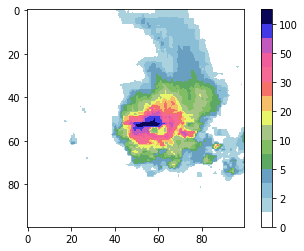

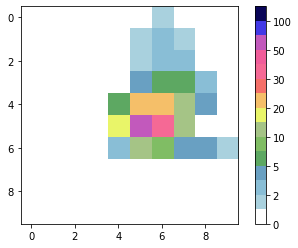

262.5
61.614173889160156
[5359 5254 5256 5255 5358 5253 5352 5257 5356 5258]
[121.5, 123.9375, 172.625, 182.75, 137.3125, 173.5625, 126.0, 211.625, 133.75, 262.5]
[204.8125, 207.5, 218.6875, 219.5625, 224.0625, 280.5, 698.125, 240.875, 243.6875, 650.5]
698.125
71.50953674316406
389.5
190.38748168945312
88.5625
62.26593017578125
[ 322 5844 8673 7414 5216 1368 5215 5492 4577 5649]
[60.190643310546875, 60.20063018798828, 60.33714294433594, 60.556800842285156, 61.614173889160156, 62.26593017578125, 61.614173889160156, 61.62313461303711, 61.74188232421875, 61.81672286987305]
[4434 4798 1624 1628 5269 2724 4805 4213 1153 4866]
[109.4073257446289, 116.97652435302734, 190.38748168945312, 119.88677978515625, 132.3206329345703, 138.78427124023438, 141.71022033691406, 131.08848571777344, 117.24530029296875, 169.8155517578125]


In [5]:
# print(np.max(real))
# print(np.max(real_x))
# print(np.max(pred_gan))
# print(np.max(pred_gan_x))
# print(real.shape)
# print(np.sort(np.max(np.max(real,axis=1),axis=1))[-10:])
# print(np.sort(np.max(np.max(real_x,axis=1),axis=1))[-10:])
# print(np.sort(np.max(np.max(pred_gan,axis=1),axis=1))[-10:])
# print(np.sort(np.max(np.max(pred_gan_x,axis=1),axis=1))[-10:])

# list = np.random.randint(1,100,size=100)
# # print(list)
# # extreme_test = list[-10:]
# # extreme_valid =  list[-20:-10]
# # print(extreme_test)
# # print(extreme_valid)
# print(list)
# print(np.argpartition(list,-10)[-10:])
# print([list[i] for i in np.argpartition(list,-10)[-10:]])

# y = np.load('/user/work/al18709/tc_data_mswep/valid_y.npy')
# y_x = np.load('/user/work/al18709/tc_data_mswep/extreme_valid_y.npy')
# print(np.max(y))
# print(np.max(y_x))

i = np.argmax(np.max(np.max(real,axis=1),axis=1))
p = np.argmax(np.max(np.max(inputs,axis=1),axis=1))
n = np.argmax(np.max(np.max(real_x,axis=1),axis=1))
q = np.argmax(np.max(np.max(inputs_x,axis=1),axis=1))

im = plt.imshow(real[i,:,:],cmap=precip_cmap,norm=precip_norm)
plt.colorbar(im)
plt.show()
im = plt.imshow(inputs[i,:,:],cmap=precip_cmap,norm=precip_norm)
plt.colorbar(im)
plt.show()
print(np.max(real[i,:,:]))
print(np.max(inputs[i,:,:]))

print(np.argpartition(real[i,:,:].flatten(),-10)[-10:])
print([real[i,:,:].flatten()[j] for j in np.argpartition(real[i,:,:].flatten(),-10)[-10:]])

print([real_x[n,:,:].flatten()[j] for j in np.argpartition(real_x[n,:,:].flatten(),-10)[-10:]])

print(np.max(real_x[n,:,:]))
print(np.max(inputs_x[n,:,:]))

print(np.max(real_x[q,:,:]))
print(np.max(inputs_x[q,:,:]))

print(np.max(real[p,:,:]))
print(np.max(inputs[p,:,:]))

print(np.argpartition(np.max(np.max(inputs,axis=1),axis=1),-10)[-10:])
print([np.max(np.max(inputs,axis=1),axis=1)[j] for j in np.argpartition(np.max(np.max(inputs,axis=1),axis=1),-10)[-10:]])

print(np.argpartition(np.max(np.max(inputs_x,axis=1),axis=1),-10)[-10:])
print([np.max(np.max(inputs_x,axis=1),axis=1)[j] for j in np.argpartition(np.max(np.max(inputs_x,axis=1),axis=1),-10)[-10:]])

In [6]:
# y = np.load('/user/work/al18709/tc_data_mswep/valid_y.npy')
x = np.load('/user/work/al18709/tc_data_mswep/extreme_test_X.npy')
y = np.load('/user/work/al18709/tc_data_mswep/extreme_test_y.npy')

# print(np.argpartition(np.max(np.max(x,axis=1),axis=1),-10)[-10:])
print([np.max(np.max(x,axis=1),axis=1)[j] for j in np.argpartition(np.max(np.max(x,axis=1),axis=1),-10)[-10:]])

# print(np.argpartition(np.max(np.max(y,axis=1),axis=1),-10)[-10:])
print([np.max(np.max(y,axis=1),axis=1)[j] for j in np.argpartition(np.max(np.max(y,axis=1),axis=1),-10)[-10:]])

[109.4073257446289, 116.97652435302734, 190.38748168945312, 119.88677978515625, 132.3206329345703, 138.78427124023438, 141.71022033691406, 131.08848571777344, 117.24530029296875, 169.8155517578125]
[389.5, 551.125, 415.875, 599.0625, 432.9375, 484.3125, 420.75, 465.4375, 698.125, 519.1875]


In [7]:
def calc_ensemble_percentile(ensemble,analysis,percentiles,inputs_hr):
	ensemble_p=np.zeros((20,len(percentiles)))
	print(ensemble.shape)
	for i in range(20):
		if analysis == 'Mean' or analysis == 'Mean (extremes)':
			p = np.percentile(np.mean(np.mean(ensemble[:,:,:,i],axis=1),axis=1), percentiles)
		elif analysis == 'Peak' or analysis == 'Peak (extremes)':
			p = np.percentile(np.max(np.max(ensemble[:,:,:,i],axis=1),axis=1), percentiles)
		elif analysis == 'Total' or analysis == 'Total (extremes)':
			p = np.percentile(np.sum(np.sum(ensemble[:,:,:,i],axis=1),axis=1), percentiles)
		elif analysis == 'Core' or analysis == 'Core (extremes)':
			mask=radMask((25,25),25,inputs_hr[0,:,:])
			n,_,_ = inputs_hr.shape
			mask = np.expand_dims(mask,axis=0)
			mask = np.repeat(mask,n,axis=0)
			p = np.percentile(np.ma.array(ensemble[:,:,:,i], mask=mask), percentiles)
		ensemble_p[i] = p
	ensemble_mean = np.mean(ensemble_p,axis=0)
	ensemble_std = np.std(ensemble_p,axis=0)
	# ensemble_min = ensemble_mean-ensemble_std
	# ensemble_max = ensemble_mean+ensemble_std
	ensemble_min = np.min(ensemble_p,axis=0)
	ensemble_max = np.max(ensemble_p,axis=0)
	print('ensemble min is: ',ensemble_min.shape)
	return ensemble_mean,ensemble_min,ensemble_max

		

In [11]:

def plot_qq(ax,analysis,inputs_hr,pred_cnn,pred_vaegan,pred_dsrnngan,real,pred_vaegan_ensemble,pred_gan_ensemble,cnn=False):
	percentiles = np.arange(0,100,0.01)

	if analysis == 'Mean' or analysis == 'Mean (extremes)':
		inputs_p = np.percentile(np.mean(np.mean(inputs_hr,axis=1),axis=1), percentiles)
		unet_p = np.percentile(np.mean(np.mean(pred_cnn,axis=1),axis=1), percentiles)
		# vaegan_p = np.percentile(np.mean(np.mean(pred_vaegan,axis=1),axis=1), percentiles)
		# dsrnngan_p = np.percentile(np.mean(np.mean(pred_dsrnngan,axis=1),axis=1), percentiles)
		vaegan_p,vaegan_min,vaegan_max = calc_ensemble_percentile(pred_vaegan_ensemble,analysis,percentiles,inputs_hr)
		dsrnngan_p,dsrnngan_min,dsrnngan_max = calc_ensemble_percentile(pred_gan_ensemble,analysis,percentiles,inputs_hr)
		real_p = np.percentile(np.mean(np.mean(real,axis=1),axis=1), percentiles)

	elif analysis == 'Peak' or analysis == 'Peak (extremes)':
		inputs_p = np.percentile(np.max(np.max(inputs_hr,axis=1),axis=1), percentiles)
		unet_p = np.percentile(np.max(np.max(pred_cnn,axis=1),axis=1), percentiles)
		# vaegan_p = np.percentile(np.max(np.max(pred_vaegan,axis=1),axis=1), percentiles)
		# dsrnngan_p = np.percentile(np.max(np.max(pred_dsrnngan,axis=1),axis=1), percentiles)
		vaegan_p,vaegan_min,vaegan_max = calc_ensemble_percentile(pred_vaegan_ensemble,analysis,percentiles,inputs_hr)
		dsrnngan_p,dsrnngan_min,dsrnngan_max = calc_ensemble_percentile(pred_gan_ensemble,analysis,percentiles,inputs_hr)
		real_p = np.percentile(np.max(np.max(real,axis=1),axis=1), percentiles)

	elif analysis == 'Total' or analysis == 'Total (extremes)':
		inputs_p = np.percentile(np.sum(np.sum(inputs_hr,axis=1),axis=1), percentiles)
		unet_p = np.percentile(np.sum(np.sum(pred_cnn,axis=1),axis=1), percentiles)
		# vaegan_p = np.percentile(pred_vaegan, percentiles)
		# dsrnngan_p = np.percentile(pred_dsrnngan, percentiles)
		vaegan_p,vaegan_min,vaegan_max = calc_ensemble_percentile(pred_vaegan_ensemble,analysis,percentiles,inputs_hr)
		dsrnngan_p,dsrnngan_min,dsrnngan_max = calc_ensemble_percentile(pred_gan_ensemble,analysis,percentiles,inputs_hr)
		real_p = np.percentile(np.sum(np.sum(real,axis=1),axis=1), percentiles)

	elif analysis == 'Core' or analysis == 'Core (extremes)':
		print(inputs_hr[0].shape)
		mask=radMask((25,25),25,inputs_hr[0,:,:])
		n,_,_ = inputs_hr.shape
		mask = np.expand_dims(mask,axis=0)
		mask = np.repeat(mask,n,axis=0)
		inputs_hr = np.ma.array(inputs_hr, mask=mask)

		inputs_p = np.percentile(np.ma.array(inputs_hr, mask=mask), percentiles)
		if cnn == False:
			unet_p = np.percentile(np.ma.array(pred_cnn, mask=mask), percentiles)
		else:
			unet_p = np.percentile(np.ma.array(pred_cnn, mask=mask), percentiles)
		# vaegan_p = np.percentile(np.ma.array(pred_vaegan, mask=mask), percentiles)
		# dsrnngan_p = np.percentile(np.ma.array(pred_dsrnngan, mask=mask), percentiles)
		vaegan_p,vaegan_min,vaegan_max = calc_ensemble_percentile(pred_vaegan_ensemble,analysis,percentiles,inputs_hr)
		dsrnngan_p,dsrnngan_min,dsrnngan_max = calc_ensemble_percentile(pred_gan_ensemble,analysis,percentiles,inputs_hr)
		real_p = np.percentile(np.ma.array(real, mask=mask), percentiles)
	
	ax.scatter(real_p,inputs_p,color='#ec9192',marker='s')
	ax.scatter(real_p,unet_p,color='#dfbe99',marker='p')
	ax.scatter(real_p,vaegan_p,color='#b5bd89',marker='^')
	ax.scatter(real_p,dsrnngan_p,color='#729ea1')
	ax.plot(real_p,real_p,'--',color='black')
	ax.legend(['Bilinear Interpolation','U-Net','VAEGAN','WGAN'],frameon=True)
	ax.fill_between(real_p, vaegan_min, vaegan_max,color='#b5bd89',alpha=0.2)
	ax.fill_between(real_p, dsrnngan_min, dsrnngan_max,color='#729ea1',alpha=0.2)
	ax.set_xlabel('Observed rain (mm / h)')
	ax.set_ylabel('Predicted rain (mm / h)')
	ax.set_title(analysis,fontsize=14,fontweight='bold')
	if analysis == 'Mean (extremes)':
		ax.set_ylim([0,17])
	elif analysis == 'Peak (extremes)':
		ax.set_ylim([0,700])
	elif analysis == 'Total (extremes)':
		ax.set_ylim([0,200000])
		ax.set_yscale('log')
		ax.set_xscale('log')
	elif analysis == 'Total':
		ax.set_yscale('log')
		ax.set_xscale('log')
	return ax

plt.style.use('seaborn-darkgrid')
# plt.rcParams["figure.figsize"] = (10,10)
sns.set_context("notebook")
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=False)
ax1 = plot_qq(axes[0,0],'Mean',inputs_hr,pred_cnn,pred_vaegan,pred_gan,real,pred_vaegan_ensemble,pred_gan_ensemble)
ax2 = plot_qq(axes[0,1],'Peak',inputs_hr,pred_cnn,pred_vaegan,pred_gan,real,pred_vaegan_ensemble,pred_gan_ensemble)
ax3 = plot_qq(axes[1,0],'Total',inputs_hr,pred_cnn,pred_vaegan,pred_gan,real,pred_vaegan_ensemble,pred_gan_ensemble)
ax4 = plot_qq(axes[1,1],'Core',inputs_hr,pred_cnn,pred_vaegan,pred_gan,real,pred_vaegan_ensemble,pred_gan_ensemble)
ax5 = plot_qq(axes[0,2],'Mean (extremes)',inputs_hr_x,pred_cnn_x,pred_vaegan_x,pred_gan_x,real_x,pred_vaegan_ensemble_x,pred_gan_ensemble_x)
ax6 = plot_qq(axes[0,3],'Peak (extremes)',inputs_hr_x,pred_cnn_x,pred_vaegan_x,pred_gan_x,real_x,pred_vaegan_ensemble_x,pred_gan_ensemble_x)
ax7 = plot_qq(axes[1,2],'Total (extremes)',inputs_hr_x,pred_cnn_x,pred_vaegan_x,pred_gan_x,real_x,pred_vaegan_ensemble_x,pred_gan_ensemble_x)
ax8 = plot_qq(axes[1,3],'Core (extremes)',inputs_hr_x,pred_cnn_x,pred_vaegan_x,pred_gan_x,real_x,pred_vaegan_ensemble_x,pred_gan_ensemble_x,cnn=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.savefig('qq_plot_Total_test_new.png',bbox_inches='tight')
plt.show()



(16007, 100, 100, 20)


In [9]:
print(pred_cnn_x.shape)
print(pred_gan_x.shape)
print(pred_vaegan_x.shape)
print(real_x.shape)

(5334, 100, 100)
(5334, 100, 100)
(5334, 100, 100)
(5334, 100, 100)


In [24]:
test = np.load('/user/home/al18709/work/tc_data_flipped/extreme_test_X.npy')
print(test.shape)

(16007, 10, 10)


In [22]:
test = np.load('/user/home/al18709/work/tc_data_mswep/extreme_test_X.npy')
print(test.shape)

(5334, 10, 10)
